In [61]:
import pandas as pd

# Load the CSV file
file_path = r'C:\Users\pharr\OneDrive\Desktop\PROJECT 4\titanic.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()


,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes


In [63]:
import pandas as pd

# Load the CSV file again to ensure titanic_data is defined
file_path = r'C:\Users\pharr\OneDrive\Desktop\PROJECT 4\titanic.csv'
titanic_data = pd.read_csv(file_path)

# Add a new column for family size
titanic_data['family_size'] = titanic_data['sibsp'] + titanic_data['parch'] + 1

# Convert 'survived' to a binary variable for easier calculation (1 for 'yes', 0 for 'no')
titanic_data['survived_binary'] = titanic_data['survived'].apply(lambda x: 1 if x == 'yes' else 0)

# Group by family size and calculate the survival rate for each group
survival_rates_by_family_size = titanic_data.groupby('family_size')['survived_binary'].mean().reset_index()
survival_rates_by_family_size.columns = ['family_size', 'survival_rate']

# Display the results
print(survival_rates_by_family_size)







   family_size  survival_rate
0          1.0       0.303299
1          2.0       0.536170
2          3.0       0.566038
3          4.0       0.697674
4          5.0       0.272727
5          6.0       0.200000
6          7.0       0.250000
7          8.0       0.000000
8         11.0       0.000000


In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define label encoders
label_encoders = {
    'gender': LabelEncoder(),
    'class': LabelEncoder()
}

# Handle missing values with .loc
features.loc[:, 'age'] = features['age'].fillna(features['age'].median())
features.loc[:, 'fare'] = features['fare'].fillna(features['fare'].median())
features.loc[:, 'family_size'] = features['family_size'].fillna(features['family_size'].median())

# Encode categorical variables
features.loc[:, 'gender'] = label_encoders['gender'].fit_transform(features['gender'])
features.loc[:, 'class'] = label_encoders['class'].fit_transform(features['class'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model 
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Random Forest Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)





Random Forest Model Accuracy: 0.79
Confusion Matrix:
[[273  31]
 [ 63  75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       304
           1       0.71      0.54      0.61       138

    accuracy                           0.79       442
   macro avg       0.76      0.72      0.73       442
weighted avg       0.78      0.79      0.78       442



C:\Users\pharr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


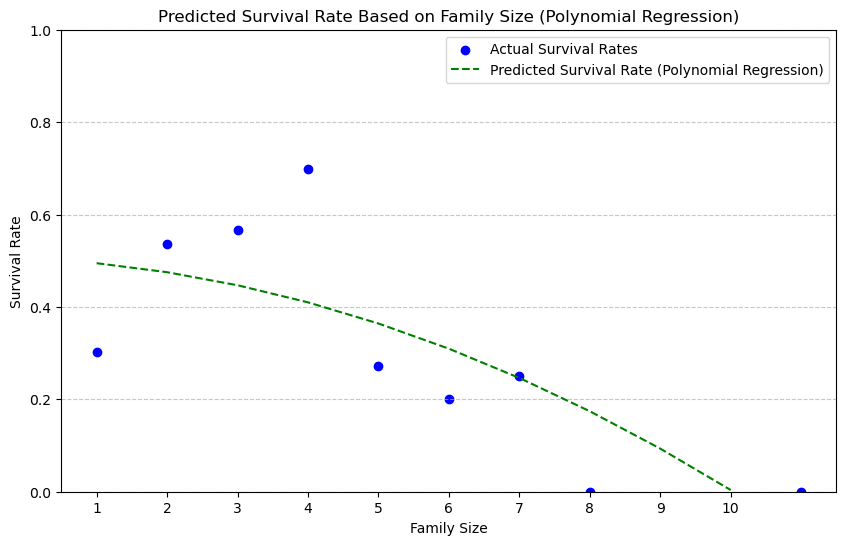

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Prepare the data for polynomial regression
X = survival_rates_by_family_size[['family_size']]  # Feature: Family size
y = survival_rates_by_family_size['survival_rate']  # Target: Survival rate

# Create a pipeline for polynomial regression 
poly = PolynomialFeatures(degree=2)
model_poly = make_pipeline(poly, LinearRegression())

# Fit the polynomial regression model to the data
model_poly.fit(X, y)

# Predict survival rates for a range of family sizes (from 1 to 10)
family_size_range = np.arange(1, 11).reshape(-1, 1)
predicted_survival_rates_poly = model_poly.predict(family_size_range)

# Plot the original survival rates and the predicted polynomial regression trend line
plt.figure(figsize=(10, 6))
plt.scatter(survival_rates_by_family_size['family_size'], survival_rates_by_family_size['survival_rate'], color='blue', label='Actual Survival Rates')
plt.plot(family_size_range, predicted_survival_rates_poly, color='green', linestyle='--', label='Predicted Survival Rate (Polynomial Regression)')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Predicted Survival Rate Based on Family Size (Polynomial Regression)')
plt.xticks(family_size_range.flatten())
plt.ylim(0, 1)  # Survival rates range between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


In [87]:
# Save the transformed data to a CSV file
survival_rates_by_family_size.to_csv(r'C:\Users\pharr\OneDrive\Desktop\PROJECT 4\survival_rates_by_family_size.csv', index=False)
